In [1]:
using Turing, Random, AdvancedVI, DelimitedFiles, DataFrames
using Plots
Random.seed!(0);

In [2]:
#Generate data
T = 400

vz, vy = 0.01, 0.1

z_data_0 = 0
z_data = [sin(pi/60) + sqrt(vz)*randn()]
x_data_0 = 0
x_data = [x_data_0 + sqrt(exp(z_data[1]))*randn()]
y_data = [x_data[1]+sqrt(vy)*randn()]
for t=2:T
    append!(z_data, sin(t*pi/60) + sqrt(vz)*randn())
    append!(x_data, x_data[end] + sqrt(exp(z_data[end]))*randn())
    append!(y_data, x_data[end]+sqrt(vy)*randn())
end

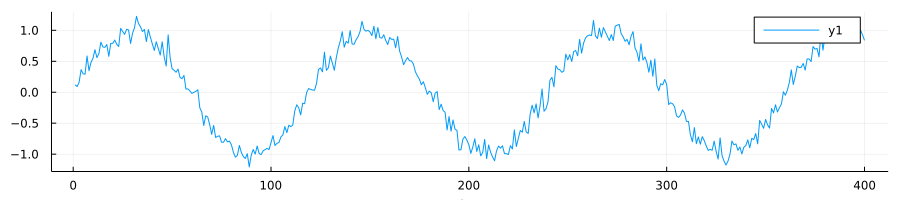

In [3]:
plot(z_data, xlabel="Time", size=(900,200))

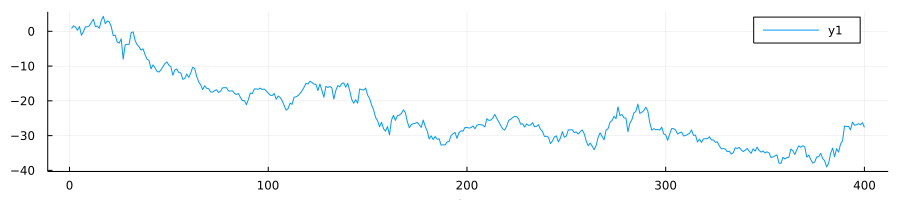

In [4]:
plot(y_data, xlabel="Time", size=(900,200))

In [5]:
@model function HGF(m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min, y_t)
    model_vz, model_vy = 0.1, 0.1
    z_t_min ~ Normal(m_z_t_min, sqrt(v_z_t_min))
    z_t ~ Normal(z_t_min, sqrt(model_vz))
    x_t_min ~ Normal(m_x_t_min, sqrt(v_x_t_min))
    x_t ~ Normal(x_t_min, sqrt(exp(z_t)))
    y_t ~ Normal(x_t, sqrt(model_vy))
end

HGF (generic function with 2 methods)

In [6]:
# Define values for prior statistics
m_z_0, v_z_0 = 0.0, 1.0
m_x_0, v_x_0 = 0.0, 1.0

m_z_t_min, v_z_t_min = m_z_0, v_z_0
m_x_t_min, v_x_t_min = m_x_0, v_x_0

advi = ADVI(10, 4000)

m_z = Vector{Float64}(undef, T)
v_z = Vector{Float64}(undef, T)
m_x = Vector{Float64}(undef, T)
v_x = Vector{Float64}(undef, T)

for t=1:T
    model = HGF(m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min, y_data[t])
    q = vi(model, advi);
    samples = rand(q,1000)
    m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min = mean(samples[2,:]), var(samples[2,:]), mean(samples[4,:]), var(samples[4,:])
    m_z[t], v_z[t], m_x[t], v_x[t] = m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min
end

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15769452378689363973
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
[ADVI] Optimizing...100% Time: 0:00:02
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 1221367087686917919
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12634173270170530540
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10580020688687022537
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 11144397522972502192
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info:

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 1949342078662441151
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 9305895221498274948
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10499378535477821296
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 17423891459957619717
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 13124144337115094398
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimi

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 20674796468226378
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 1771666619638629980
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 14994234861437097762
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16434311994170033177
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10914763032494247720
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimize

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 7001680484156879700
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15470413630685656765
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 9588448219954469213
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 17282679345380070598
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5222809275539359167
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimiz

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 1566464287513243362
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 2277702973712436676
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 2628155862245998443
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15021582367600318645
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10741841094962804080
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimiz

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 6461170602956993313
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 7601441312468380343
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16714625579023814078
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4994374877216070127
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12420688479816421069
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimiz

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15780044779790743532
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4580577401772260446
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15698343067536009308
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 17201052164159395252
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 9641719425203174647
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimi

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 13539543274779728046
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15191110612523531333
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 3529720117617847815
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16711521857206864247
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16480069273692200287
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optim

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 9761183985640961560
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 2155462079792700160
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12839411052005905218
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 17776917573923220264
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 6749266256777896806
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimiz

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5438992685337307216
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15794166769864205420
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 2621969823342177744
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12076399112266297860
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12249369233417024773
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/yCVq7/src/AdvancedVI.jl:199


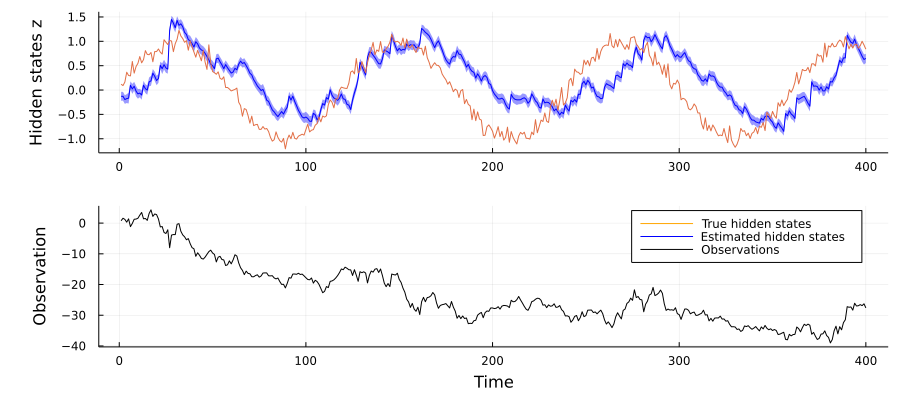

In [7]:
gr()
l = @layout [a ; b]

p1 = plot(m_z, ribbon=v_z, fillalpha=0.4, lw=1, color=:blue, label="Estimated hidden states",legend=false, yaxis="Hidden states z")
plot!(z_data,lw=1,label="True hidden states")

p2 = plot([fill(NaN, T) fill(NaN, T) y_data], lw=1, color=[:orange :blue :black], label=["True hidden states" "Estimated hidden states" "Observations"], legend=:topright, xaxis="Time", yaxis="Observation", link=:x)

p = plot(p1, p2, layout = l, size = (900, 400), left_margin = 10Plots.mm, bottom_margin = 5Plots.mm)

In [8]:
writedlm("ADVImeanestimates.txt", m_z)
writedlm("ADVIvarestimates.txt", v_z)